# Building a House Price Predictor API  
The client is interested in forecasting houses so the company can look to invest. Rather than using a registered valuer they're looking for something which can be done using the latest technology. Jamie has collected some data on existing house prices over the last few years and has asked to see what you can do. 

# 1. Import Data

In [50]:
import pandas as pd

In [51]:
data = pd.read_csv("./data/regressiondata.csv", index_col="ID")
data

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
0,2020.12,17.0,467.644775,4.0,5222.0,467104
1,2021.04,36.0,659.924963,3.0,5222.0,547714
2,2019.04,38.0,305.475941,7.0,5213.0,277232
3,2021.10,11.0,607.034754,5.0,5213.0,295958
4,2021.02,14.0,378.827222,5.0,5614.0,439963
...,...,...,...,...,...,...
9351,2019.07,36.0,554.324820,3.0,5217.0,420246
9352,2021.02,21.0,2296.349397,4.0,5614.0,256087
9353,2020.11,18.0,856.174897,0.0,5614.0,257663


In [52]:
data.iloc[0:5, 3:6]

,NumberOfPubs,PostCode,HousePrice
ID,,,
0,4.0,5222.0,467104
1,3.0,5222.0,547714
2,7.0,5213.0,277232
3,5.0,5213.0,295958
4,5.0,5614.0,439963


In [53]:
data.iloc[9355]

TransactionDate         2020.12
HouseAge                   20.0
DistanceToStation    584.007146
NumberOfPubs                4.0
PostCode                 5614.0
HousePrice               403096
Name: 9355, dtype: object

In [54]:
data.isna().sum()

TransactionDate      2
HouseAge             4
DistanceToStation    2
NumberOfPubs         2
PostCode             2
HousePrice           7
dtype: int64

In [55]:
data.dropna(inplace=True)

In [56]:
data.isna().sum()

TransactionDate      0
HouseAge             0
DistanceToStation    0
NumberOfPubs         0
PostCode             0
HousePrice           0
dtype: int64

# 2. Split Data to Prevent Snooping Bias

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
train, test = train_test_split(data, test_size=.3, random_state=1234)

In [59]:
type(train)

pandas.core.frame.DataFrame

In [60]:
print(f"Train dimensions: {train.shape}")
print(f"Test dimensions: {test.shape}")

Train dimensions: (6542, 6)
Test dimensions: (2804, 6)


# 3. Exploratory Data Analysis

## Bird's Eye View

In [61]:
train.iloc[0].to_dict()

{'TransactionDate': 2019.12,
 'HouseAge': 22.0,
 'DistanceToStation': 333.0470519,
 'NumberOfPubs': 6.0,
 'PostCode': 5217.0,
 'HousePrice': '265932'}

In [62]:
train.iloc[0].HouseAge

np.float64(22.0)

In [63]:
train.iloc[0].HousePrice

'265932'

In [64]:
train.dtypes

TransactionDate      float64
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode             float64
HousePrice            object
dtype: object

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6542 entries, 7676 to 8925
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   TransactionDate    6542 non-null   float64
 1   HouseAge           6542 non-null   float64
 2   DistanceToStation  6542 non-null   float64
 3   NumberOfPubs       6542 non-null   float64
 4   PostCode           6542 non-null   float64
 5   HousePrice         6542 non-null   object 
dtypes: float64(5), object(1)
memory usage: 357.8+ KB


In [66]:
train.describe()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode
count,6542.000000,6542.000000,6542.000000,6.542000e+03,6542.000000
mean,2020.073785,17.424182,1097.857571,7.683571e+02,5294.078569
std,0.813844,11.353568,1274.867930,6.181791e+04,158.069621
min,2019.010000,0.000000,23.829424,0.000000e+00,5212.000000
25%,2019.100000,9.000000,267.335077,1.000000e+00,5213.000000
50%,2020.070000,16.000000,547.660794,4.000000e+00,5217.000000
75%,2021.040000,28.000000,1516.795692,6.000000e+00,5222.000000
max,2021.120000,43.000000,6485.631207,4.999999e+06,5614.000000


In [67]:
train["PostCode"] = train["PostCode"].astype("str")
train["TransactionDate"] = train["TransactionDate"].astype("str")

In [68]:
train.describe(include="object")

,TransactionDate,PostCode,HousePrice
count,6542,6542,6542
unique,36,5,6495
top,2021.06,5212.0,??
freq,207,1351,3


## Analyse Numerical Attributes

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

### Plot Distributions

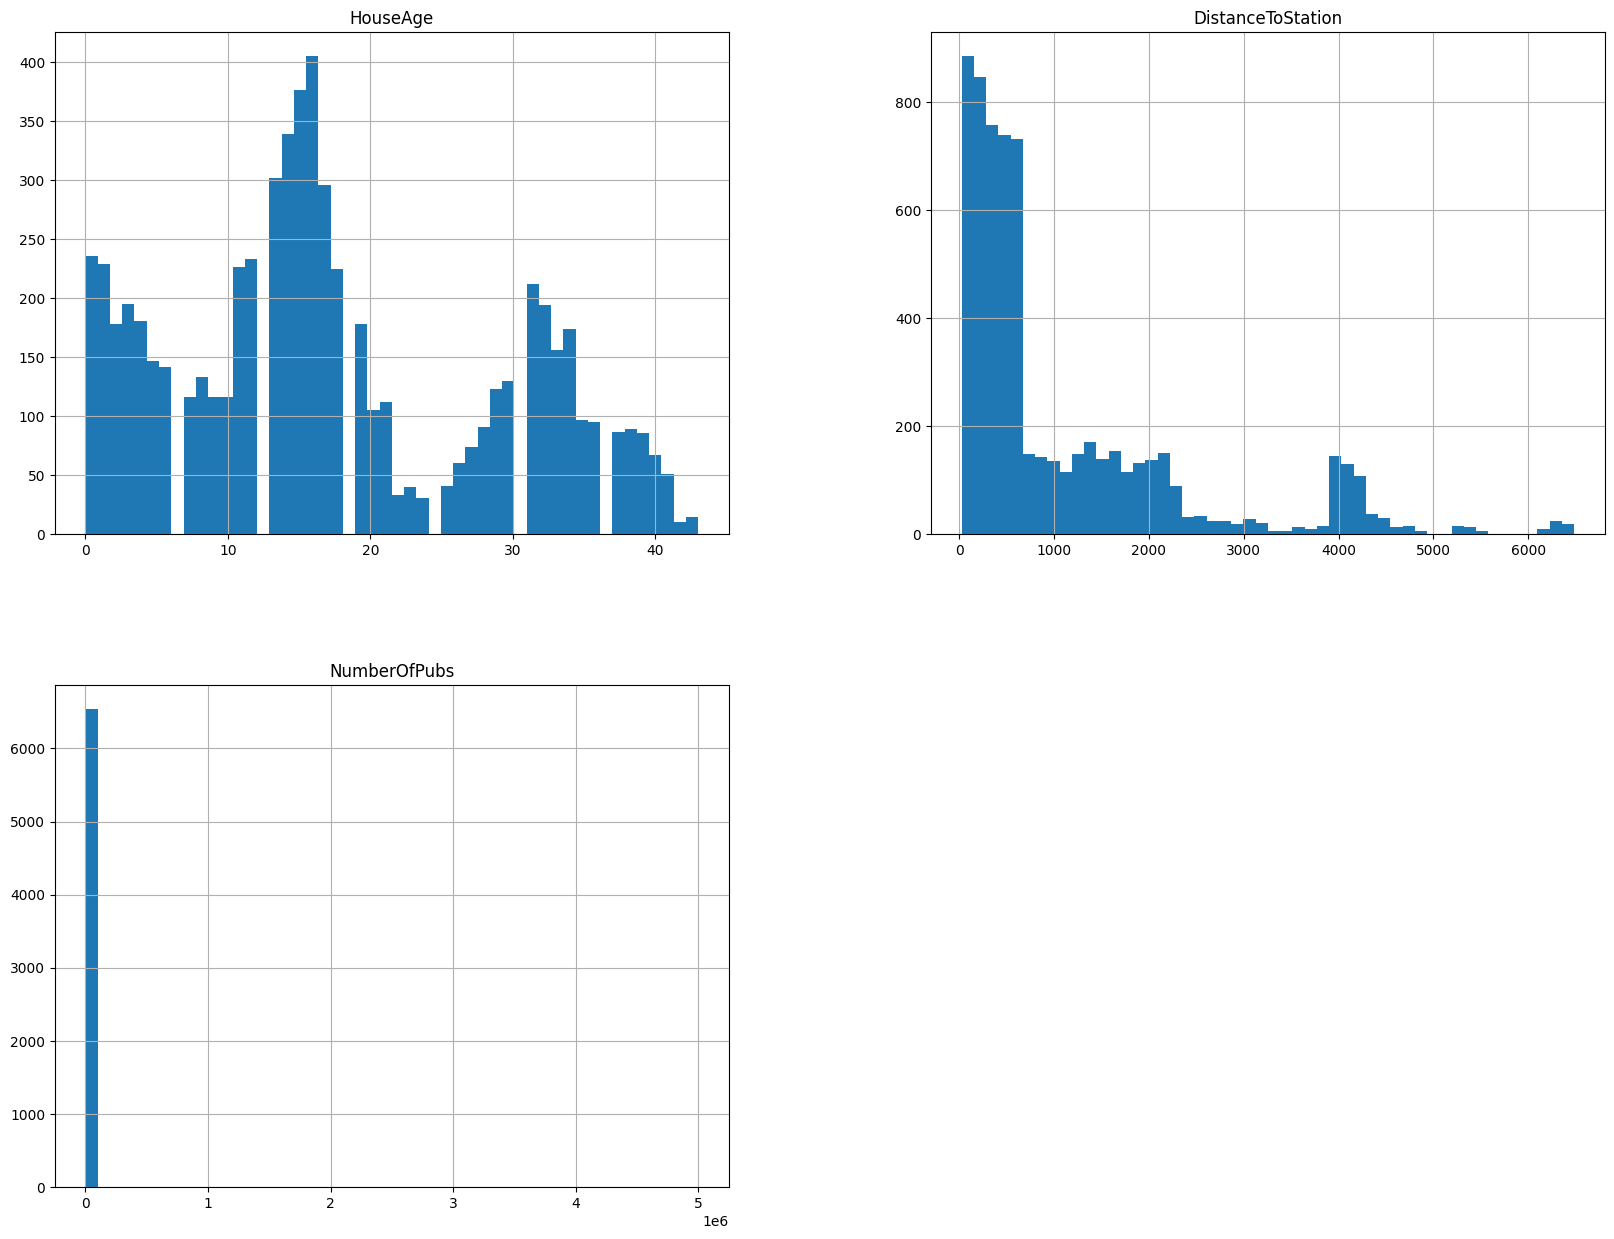

In [70]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

### Why isn't House Price Showing up as Numeric?

In [71]:
# Error: ValueError: could not convert string to float: '??'
# train["HousePrice"] = train["HousePrice"].astype("float")

In [72]:
train[train["HousePrice"] == "??"]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
73,2020.07,14.0,461.499113,1.0,5213.0,??
5620,2021.04,34.0,460.489917,5.0,5222.0,??
8718,2020.08,16.0,122.432508,5.0,5213.0,??


In [73]:
train = train[train["HousePrice"] != "??"]

In [74]:
train[train["HousePrice"] == "??"]

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,


In [75]:
train["HousePrice"] = train["HousePrice"].astype("float")

In [76]:
train.dtypes

TransactionDate       object
HouseAge             float64
DistanceToStation    float64
NumberOfPubs         float64
PostCode              object
HousePrice           float64
dtype: object

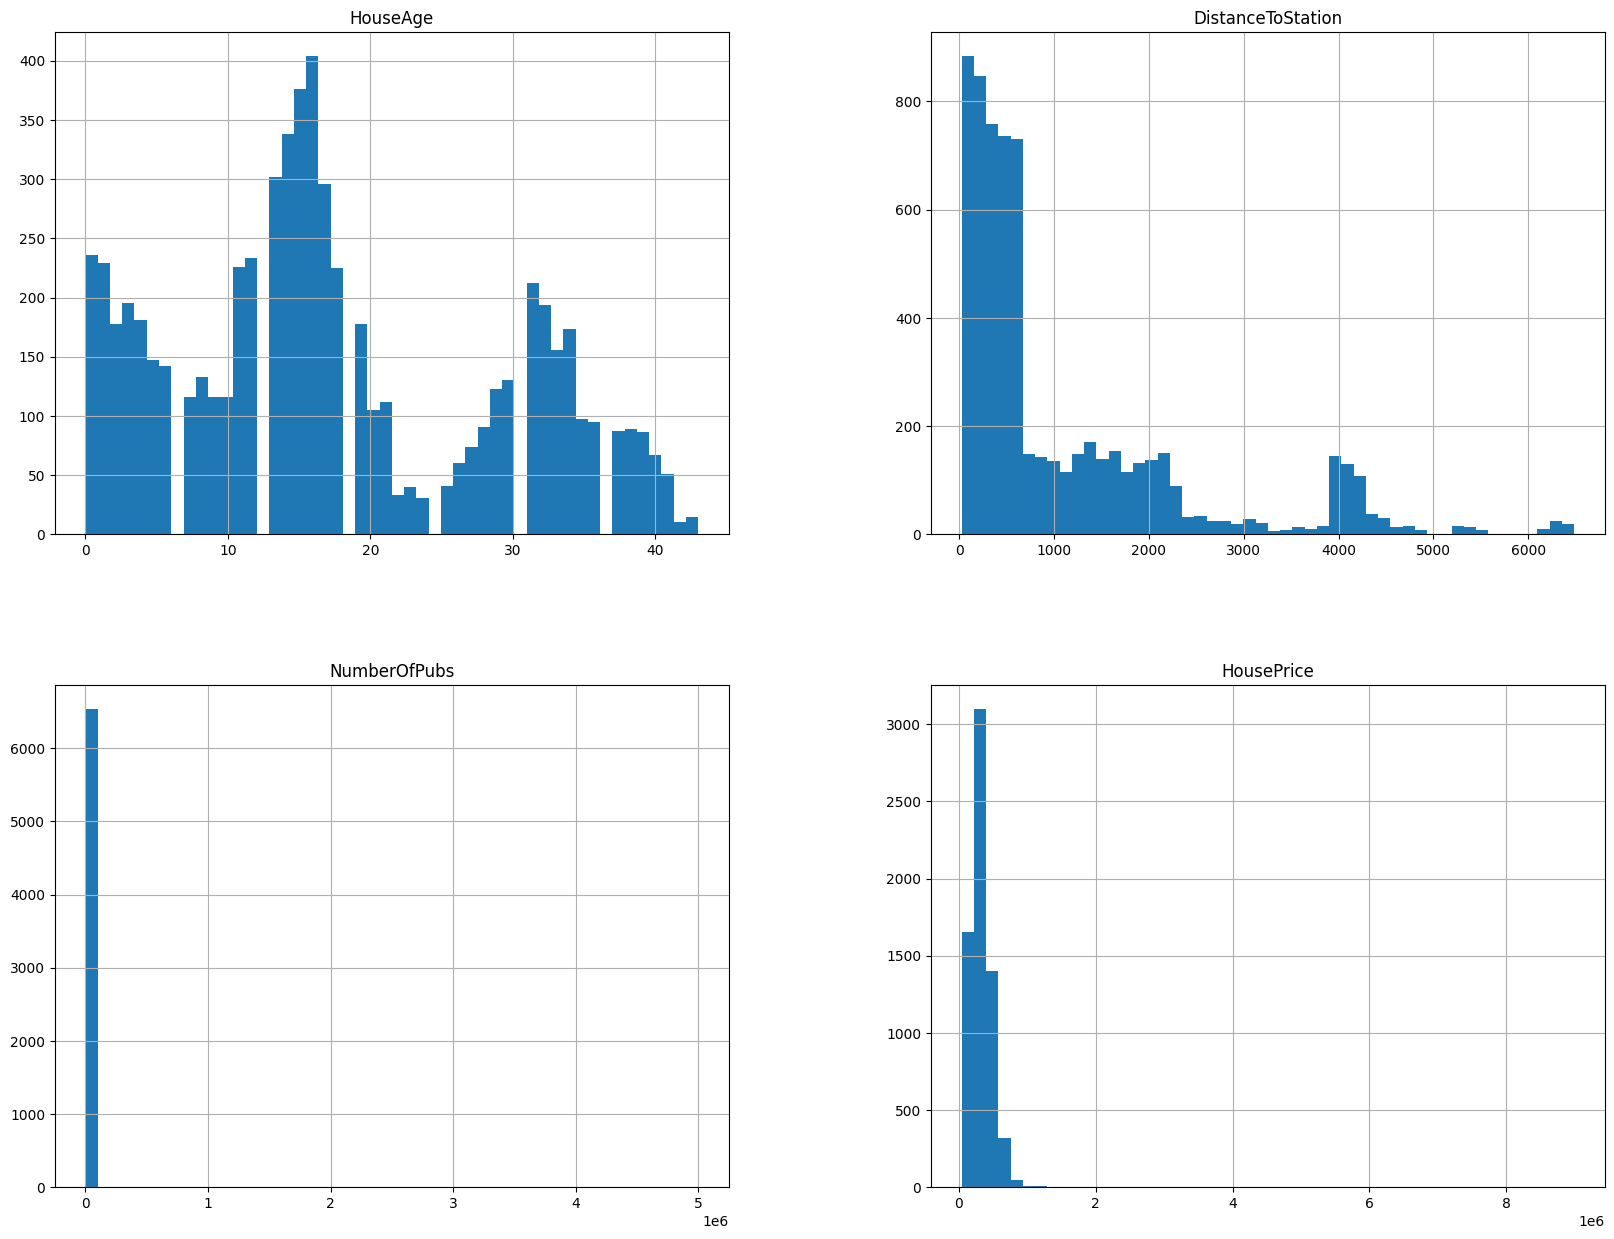

In [77]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

<Axes: xlabel='HousePrice'>

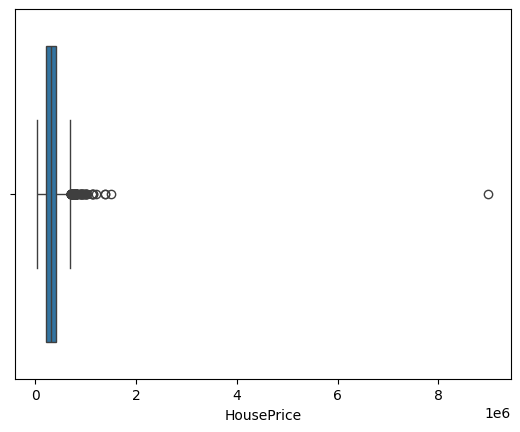

In [78]:
sns.boxplot(x="HousePrice", data=train)

### Drop Outlier 

In [79]:
train.sort_values("HousePrice", ascending=False).head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
8445,2021.05,0.0,276.789752,9.0,5222.0,8989772.0
2749,2021.06,9.0,38.864337,1.0,5222.0,1504501.0
6066,2020.12,10.0,234.680008,1.0,5222.0,1374386.0
149,2020.09,9.0,228.930655,1.0,5222.0,1374277.0
9238,2019.11,10.0,169.424413,1.0,5222.0,1205920.0


In [80]:
train = train.drop(train[train["HousePrice"] > 3000000].index)
# train = train.drop(8445)

### What's happening with pubs

In [81]:
train.sort_values("NumberOfPubs", ascending=False).head()

,TransactionDate,HouseAge,DistanceToStation,NumberOfPubs,PostCode,HousePrice
ID,,,,,,
13,2019.05,8.0,273.264542,4999999.0,5213.0,356012.0
4559,2019.06,32.0,262.506963,10.0,5212.0,286557.0
1309,2020.08,31.0,88.641871,10.0,5213.0,343825.0
4343,2021.02,3.0,382.351620,10.0,5212.0,434623.0
6332,2020.07,32.0,134.265402,10.0,5213.0,340403.0


In [82]:
# train = train.drop(13)
# train = train.drop(train[train["NumberOfPubs"] > 20].index)
train.drop(train[train["NumberOfPubs"] > 20].index, inplace=True)

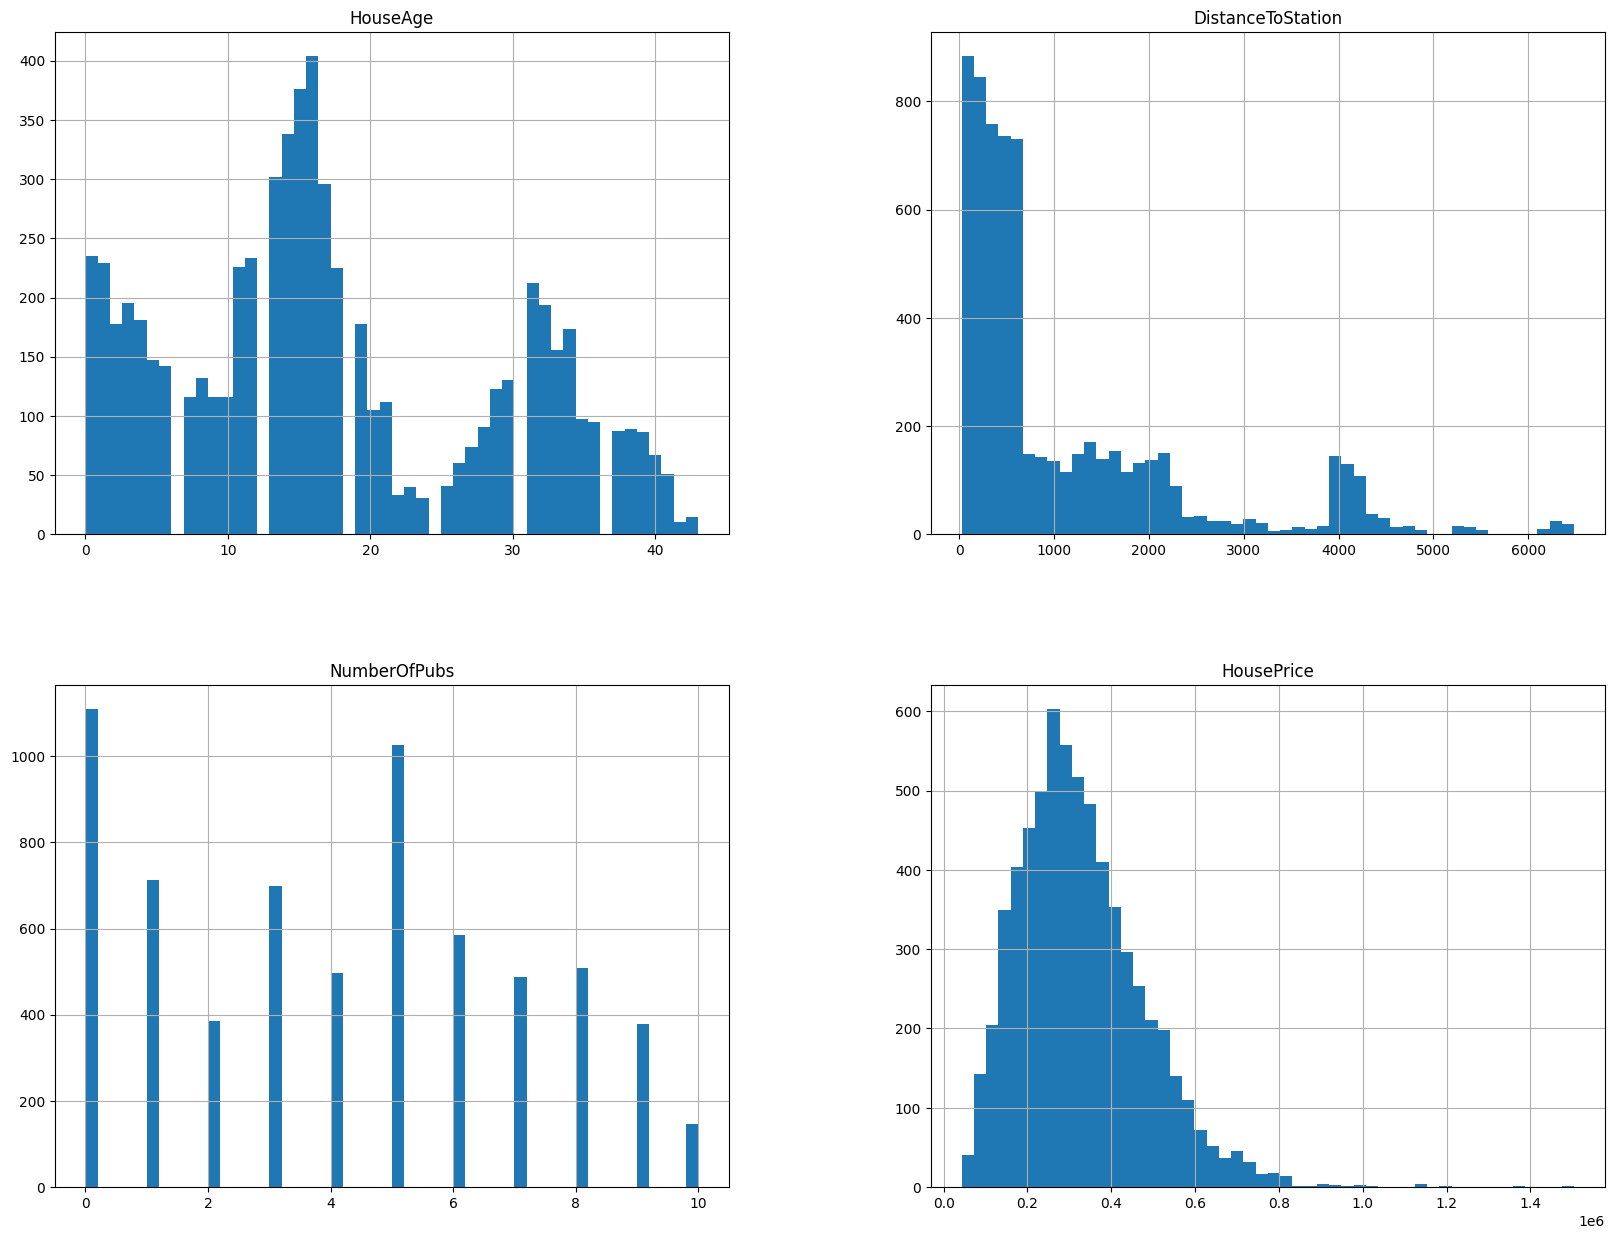

In [83]:
train.hist(bins=50, figsize=(20, 15))
plt.show()

## Analyse Categorical Variables

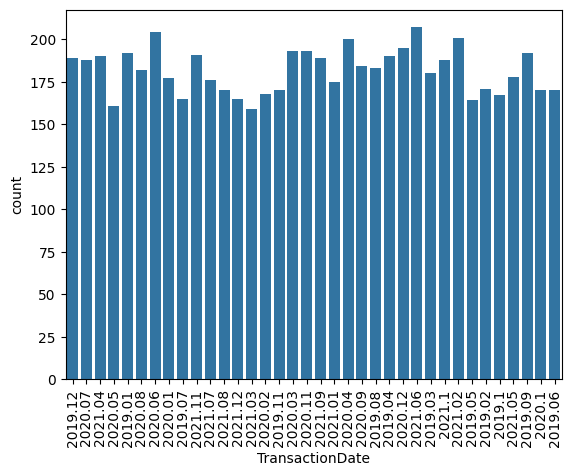

In [84]:
sns.countplot(x="TransactionDate", data=train)
plt.xticks(rotation=90)
plt.show()

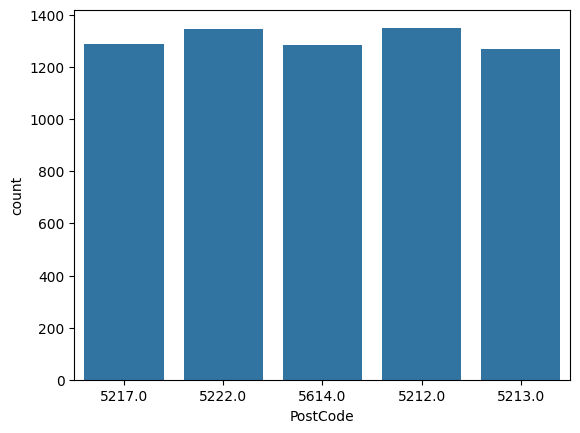

In [85]:
sns.countplot(x="PostCode", data=train)
plt.show()

## Analyse Relationships Numeric/Numeric

### Calculate Pearson's Correlation

## Analyse Relationships Cat/Num

### Is Post Code Driving Value?

### What about the date it was sold?

# 4. Data Preprocessing

## Build Preprocessing Function

## Preview Preprocessed Data

## Clean up Analysis Features

## Create X and y values

# 5. Modelling

## Import ML Dependencies

## Create Pipelines

### Training Outside of a Pipeline

## Create Tuning Grids

## Train Models and Perform HPO

# 6. Evaluate Models

## Import Evaluation Metrics

## Preprocess Test Set For Predictions

### Look for Nulls

### Check datatypes

### Create X_test and y_test 

## Calculate Regression Metrics

## Make Predictions

## Explain model

### Calculate Feature Importance

### Calculate Feature Importance for All Models

### Plot Trees

# 7. Save model